In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
import pickle
import pytorch_lightning as pl
import torchvision.transforms as T

from PIL import Image
from pathlib import Path
from pytorch_lightning.callbacks import TQDMProgressBar
from tqdm.notebook import tqdm
from typing import List, Union, Callable

from lib.datamodule import ImageNetModule, CatStudyModule
from lib.model import ImageNetModel

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

In [ ]:
# set checkpoint
checkpoint = '/old_home/ammeling/projects/ImageNet/checkpoints/ImageNetModel_Pilot_epoch14_val_acc0.73.ckpt'

# load model 
model = ImageNetModel().load_from_checkpoint(checkpoint)

In [ ]:
# set up grad cam
target_layers = [model.feature_extractor[-2]] # last conv layer before AdAvgPool

# construct cam object
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

In [ ]:
# set grad cam dir 
grad_cam_dir = Path('Katzenstudie_GradCAM')
grad_cam_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
import torchvision.transforms as T

# set transforms
to_tensor = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
resize = T.Resize((224,224))

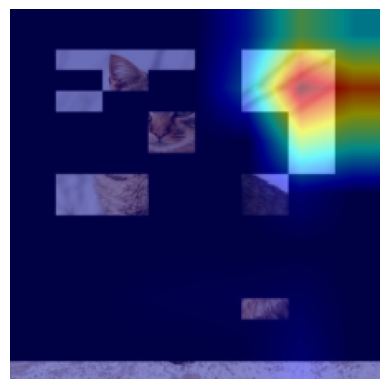

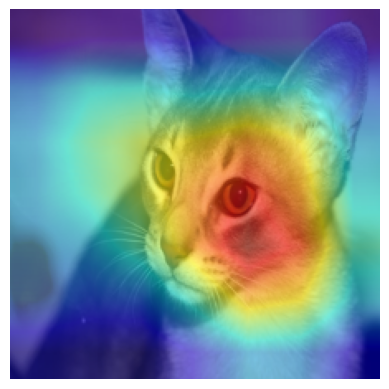

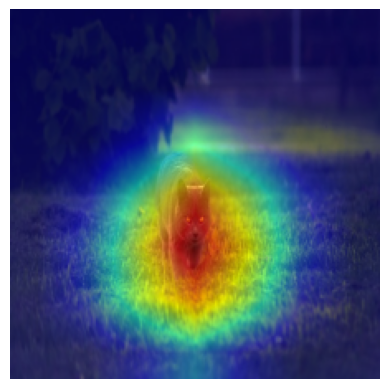

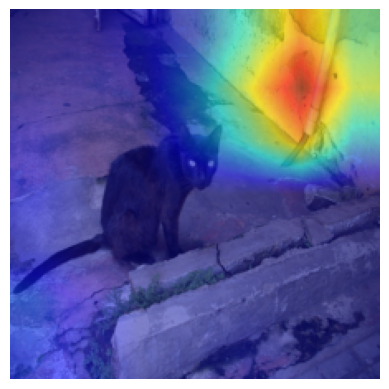

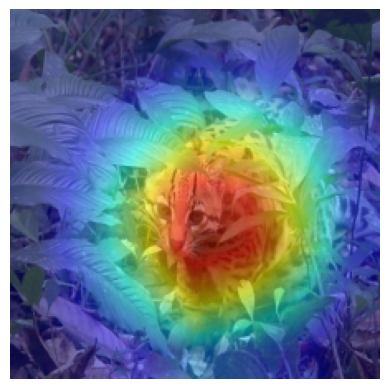

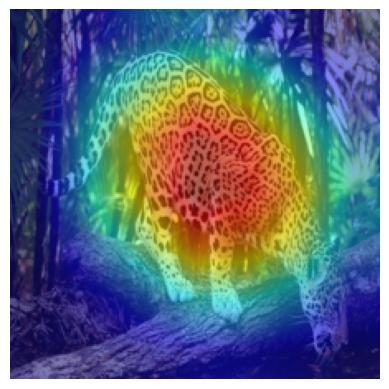

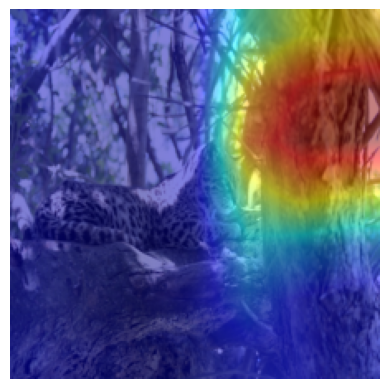

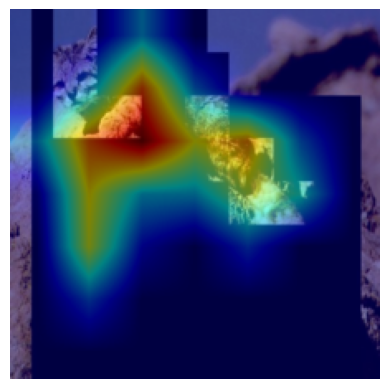

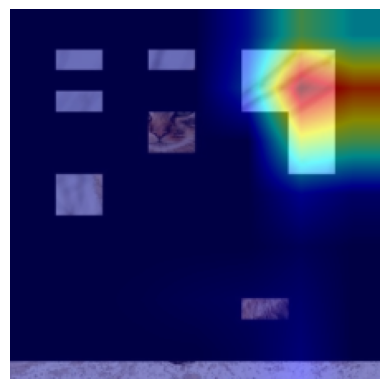

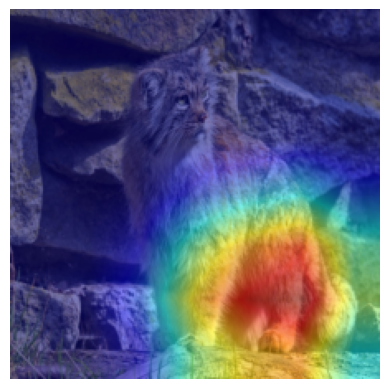

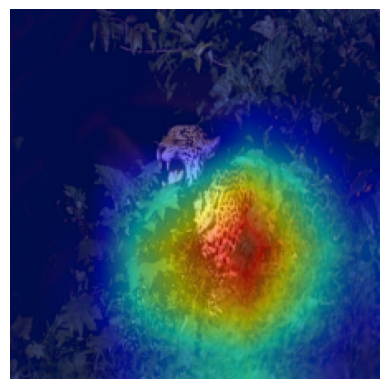

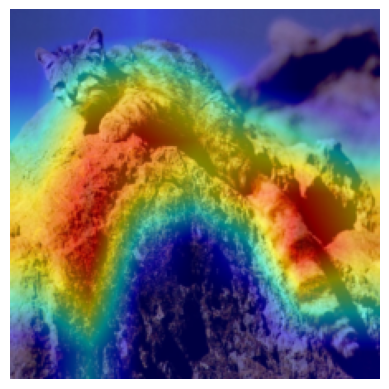

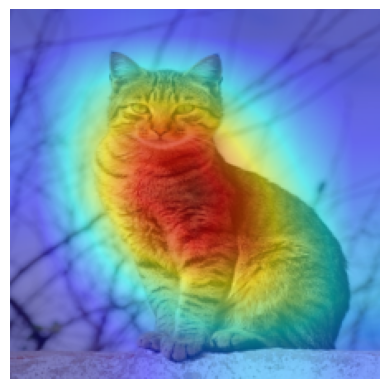

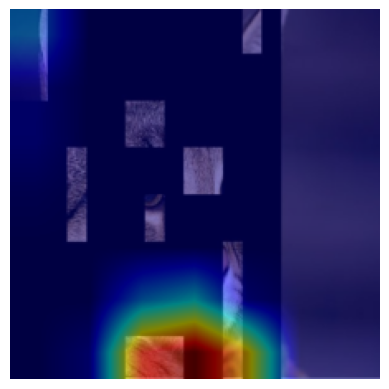

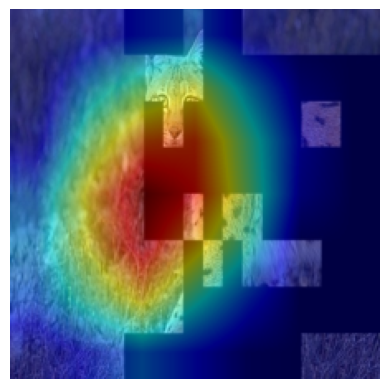

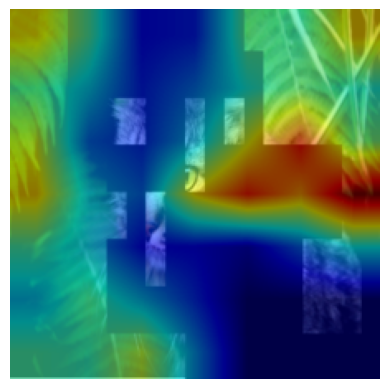

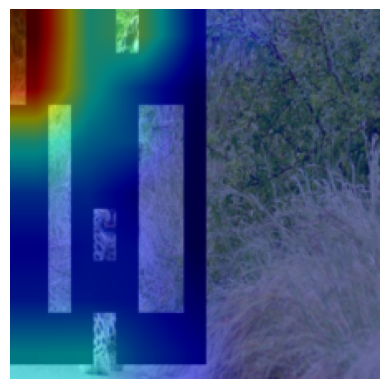

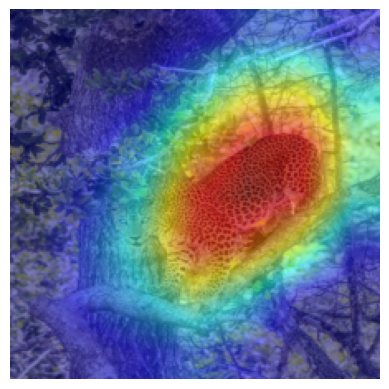

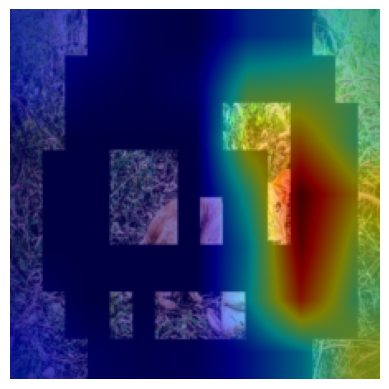

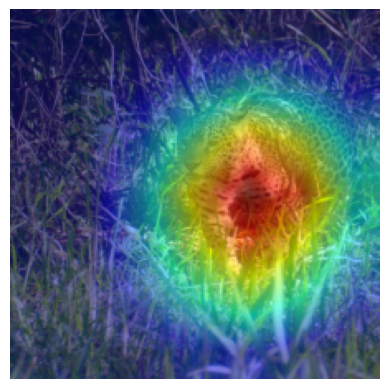

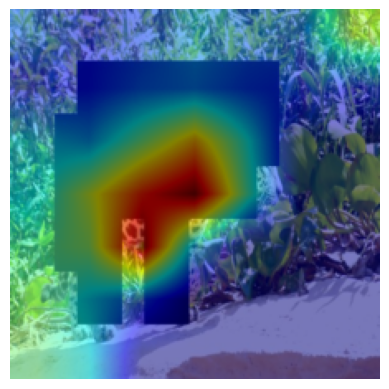

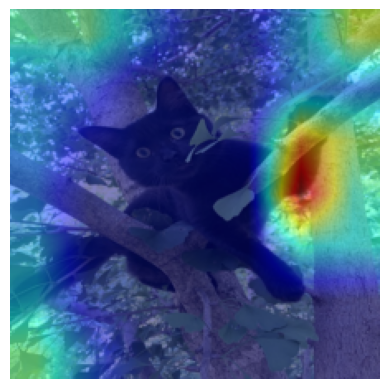

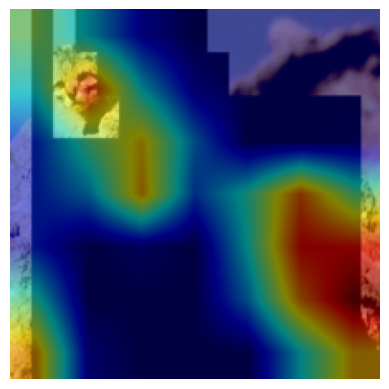

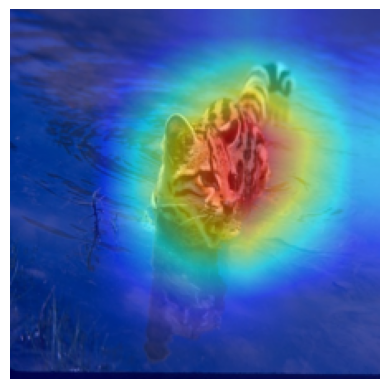

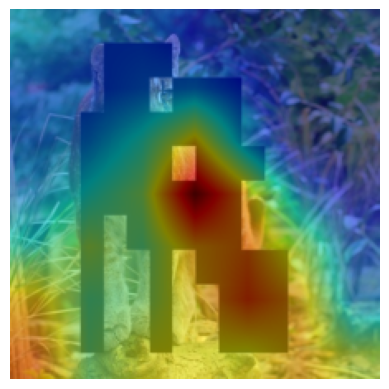

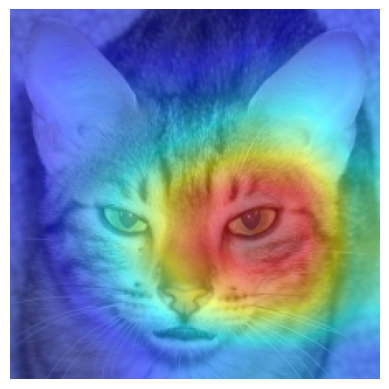

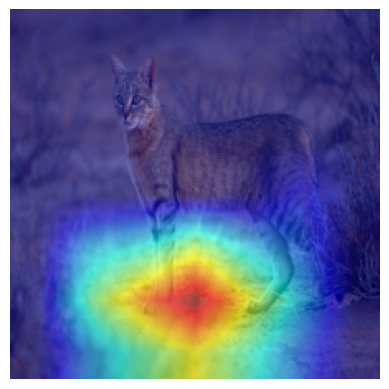

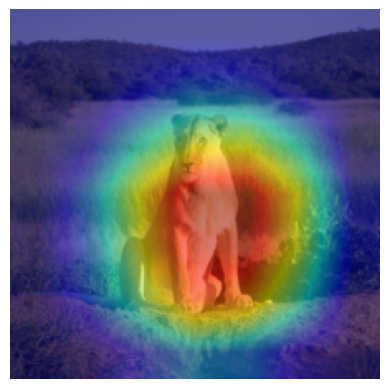

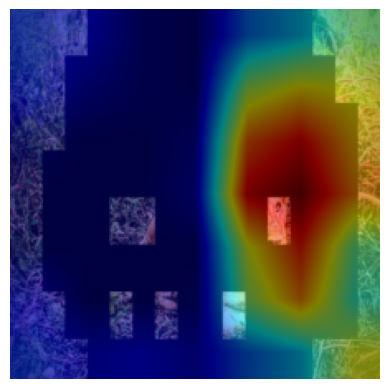

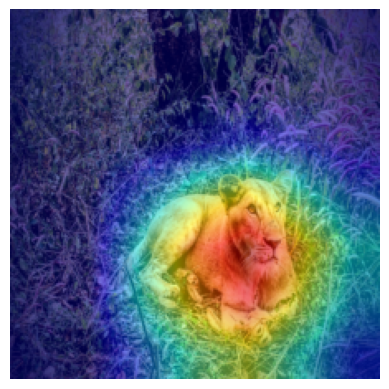

In [ ]:
# excluded data 
colormap = cv2.COLORMAP_JET

# make dir
sub_dir = grad_cam_dir.joinpath(excluded_dir.name)
sub_dir.mkdir(exist_ok=True, parents=True)

# select an image
for idx, cat in enumerate(excluded_dir.iterdir()):

    # load image 
    rgb_img = Image.open(cat).convert('RGB')
    input_tensor = to_tensor(rgb_img)
    rgb_img = np.array(resize(rgb_img)) / 255

    # construct GradCAM
    grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0))
    grayscale_cam = grayscale_cam.squeeze()
    visualization = show_cam_on_image(
        rgb_img, 
        grayscale_cam, 
        colormap=colormap,
        use_rgb=True)
    

    plt.figure()
    plt.imshow(visualization)
    plt.axis('off')
    plt.show()
    
    # # save grad cam
    # save_name = sub_dir.joinpath(cat.name)
    # img = Image.fromarray(visualization)
    # img.save(save_name)



In [ ]:
# experimental data 


# make dir
sub_dir = grad_cam_dir.joinpath(experimental_dir.name)
sub_dir.mkdir(exist_ok=True, parents=True)

# select an image
for idx, cat in enumerate(experimental_dir.iterdir()):

    # load image 
    rgb_img = Image.open(cat).convert('RGB')
    input_tensor = to_tensor(rgb_img)
    rgb_img = np.array(resize(rgb_img)) / 255

    # construct GradCAM
    grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0))
    grayscale_cam = grayscale_cam.squeeze()
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # save grad cam
    save_name = sub_dir.joinpath(cat.name)
    img = Image.fromarray(visualization)
    img.save(save_name)

In [ ]:
# validation data 

# make dir
sub_dir = grad_cam_dir.joinpath(validation_dir.name)
sub_dir.mkdir(exist_ok=True, parents=True)

# select an image
for idx, cat in enumerate(validation_dir.iterdir()):

    # load image 
    rgb_img = Image.open(cat).convert('RGB')
    input_tensor = to_tensor(rgb_img)
    rgb_img = np.array(resize(rgb_img)) / 255

    # construct GradCAM
    grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0))
    grayscale_cam = grayscale_cam.squeeze()
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # save grad cam
    save_name = sub_dir.joinpath(cat.name)
    img = Image.fromarray(visualization)
    img.save(save_name)